In [1]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
from sklearn import preprocessing
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
ACTOR = "genscen_Gorssel_50000_12-06-2021-03-06-15.tar.gz"

In [3]:
experiments, outcomes = load_results("simulation/generated/" + ACTOR)
dike_model, planning_steps = get_model_for_problem_formulation("Gorssel")
uncertainties = [uncertainty.name for uncertainty in dike_model.uncertainties]
x = experiments[uncertainties]
outcomes_df = pd.DataFrame(outcomes)

In [4]:
outcomes_df.columns.values.tolist()

['Difference in Expected Annual Damage Gorssel-Deventer',
 'Difference in Expected Number of Deaths Gorssel-Deventer',
 'Gorssel Expected Annual Damage',
 'Gorssel Expected Number of Deaths',
 'Gorssel Total Costs']

In [5]:
DIFDAMAGE = outcomes_df.columns[0]
DIFDEATHS = outcomes_df.columns[1]
DAMAGE = outcomes_df.columns[2]
DEATHS = outcomes_df.columns[3]
COSTS = outcomes_df.columns[4]

C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)
C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)
C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)
C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_

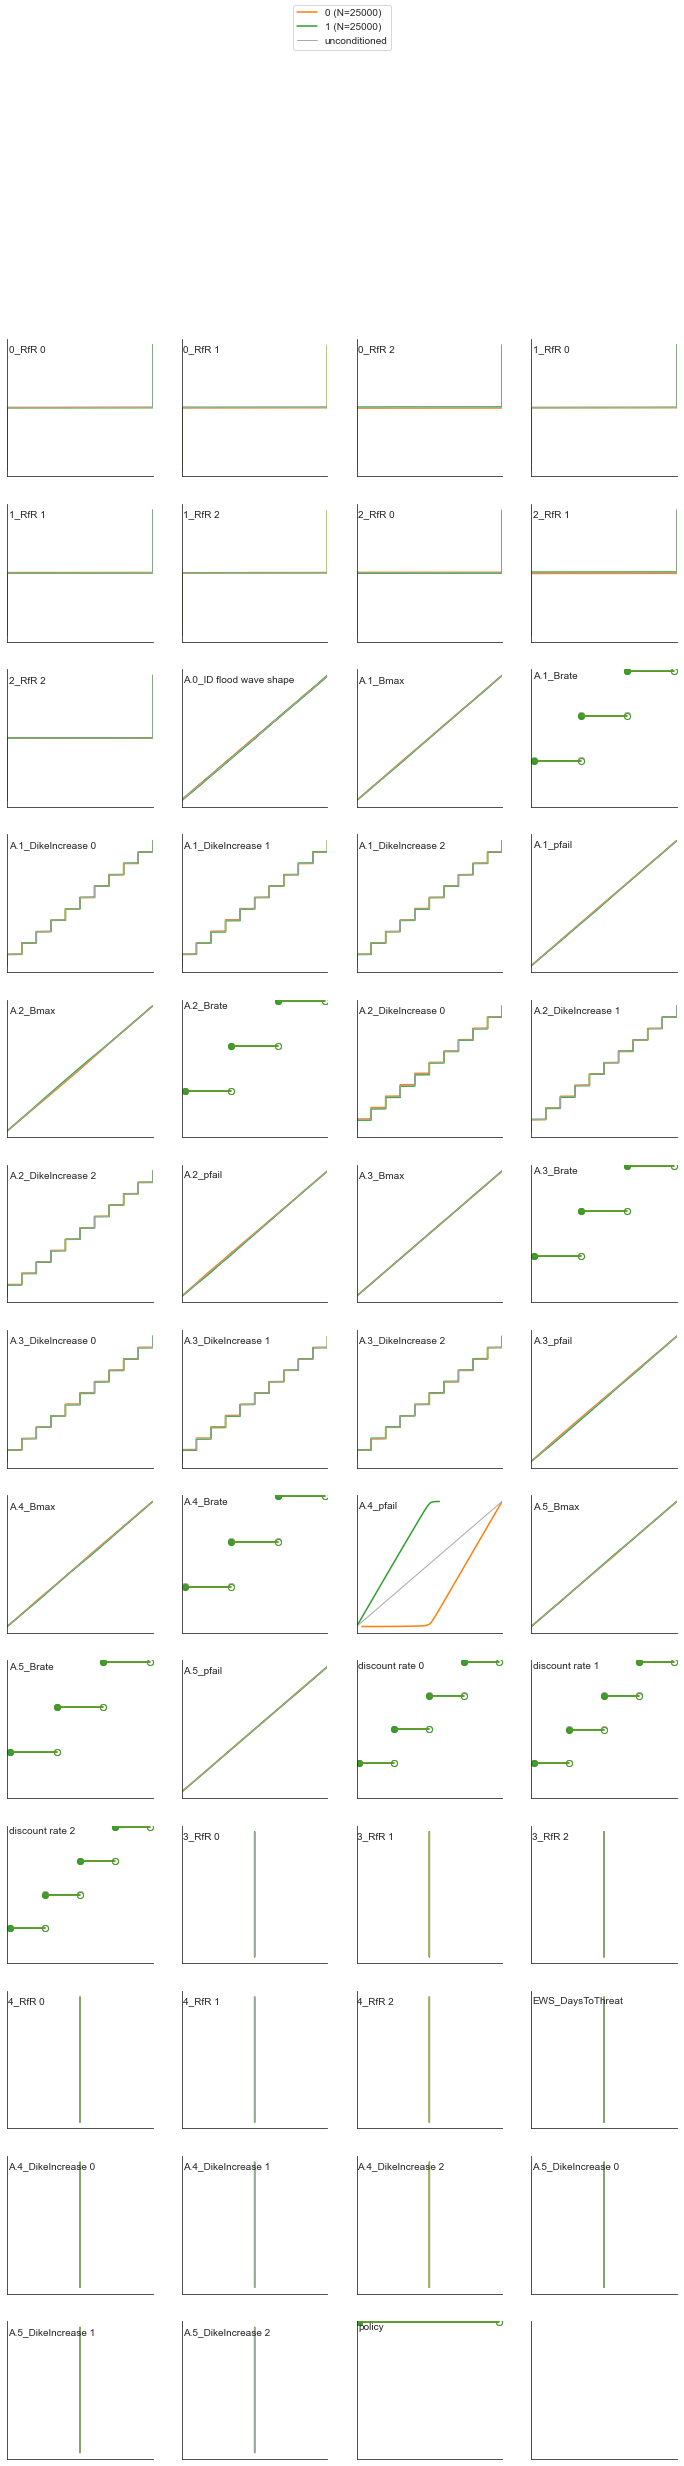

In [6]:
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf

sns.set_style('white')

# model is the same across experiments
x = experiments.copy()
x = x.drop('model', axis=1)
y = outcomes[DEATHS] >  np.percentile(a=outcomes_df[DEATHS], q=50)
fig = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()

Just as sensitivity analsyis showed, the outcomes are most sensitivie to A.4_pfail.

In [7]:
outcomes_df.loc[outcomes_df[DIFDAMAGE] > 0]

,Difference in Expected Annual Damage Gorssel-Deventer,Difference in Expected Number of Deaths Gorssel-Deventer,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs


Looks like there is always more damage in Deventer than in Gorssel if there are not any policies in place

In [8]:
len(outcomes_df.loc[outcomes_df[DIFDAMAGE] > 0])

0

In [9]:
outcomes_df.describe(percentiles=np.arange(0, 1, 0.1))

,Difference in Expected Annual Damage Gorssel-Deventer,Difference in Expected Number of Deaths Gorssel-Deventer,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs
count,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.0
mean,-2195.842747,-1.820303e-06,4.394637e+07,0.021209,0.0
std,2558.744855,2.280280e-06,4.660492e+07,0.020512,0.0
min,-16316.748534,-1.057313e-05,0.000000e+00,0.000000,0.0
0%,-16316.748534,-1.057313e-05,0.000000e+00,0.000000,0.0
10%,-5852.691383,-5.174198e-06,2.804631e+06,0.001676,0.0
20%,-3362.048957,-3.213099e-06,6.498399e+06,0.004197,0.0
30%,-2033.402478,-1.871860e-06,8.958514e+06,0.004837,0.0
40%,-1514.690034,-1.173131e-06,1.394666e+07,0.008550,0.0
50%,-1213.798597,-7.219704e-07,1.998865e+07,0.010051,0.0


Obviously, without any policies inplace, there also aren't any costs for Gorssel.

In [10]:
prim_algs = {}
percentiles = [20, 90]

def conditional(outcome, q):
    global percentiles
    if q == percentiles[0]:
        return outcomes_df[outcome] < np.percentile(a=outcomes_df[outcome], q=q)
    elif q == percentiles[1]:
        return outcomes_df[outcome] > np.percentile(a=outcomes_df[outcome], q=q)  
            
for q in percentiles:
    prim_algs[q] = {}   
    for outcome in [DAMAGE, DEATHS]:
        #code block below performs a rotation of data
    #     x_numeric = x.select_dtypes(exclude=pd.CategoricalDtype)
    #     x_categorical = x.select_dtypes(include=pd.CategoricalDtype)
    #     rotated_experiments, rotation_matrix = prim.pca_preprocess(x_numeric, outcomes_df[outcome] > np.percentile(a=outcomes_df[outcome], q=90))
    #     rotated_x = pd.concat([rotated_experiments, x_categorical], axis=1)
    #     rotated_x.columns = x_numeric.columns.tolist() + x_categorical.columns.tolist()
    #     x = rotated_x

        prim_algs[q][outcome] = prim.Prim(x,  conditional(outcome, q), threshold=0.8)

In [11]:
boxes = {}
for upperkey in percentiles:
    boxes[upperkey] = {}
    for lowerkey in [DAMAGE, DEATHS]:
        boxes[upperkey][lowerkey] = prim_algs[upperkey][lowerkey].find_box()

20


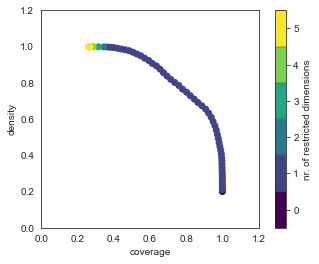

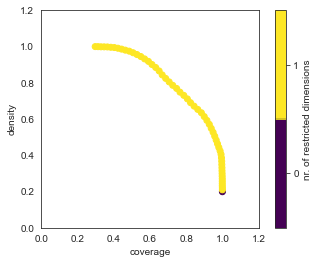

90


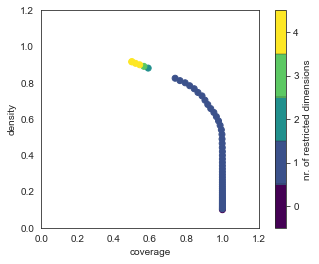

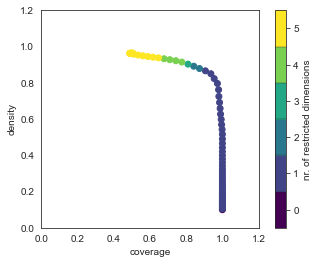

In [12]:
for upperkey, percentile in boxes.items():
    print(upperkey)
    for lowerkey, box in percentile.items():
        box.show_tradeoff()
        plt.show()

# Trying around to find the right box

## Damage

coverage      0.7372
density     0.802002
id                33
mass         0.18384
mean        0.802002
res_dim            1
Name: 33, dtype: object

             box 33                       
                min       max    qp values
A.4_pfail  0.816157  0.999988  [0.0, -1.0]



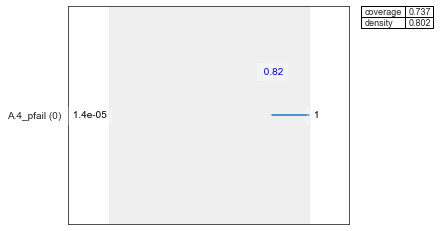

In [13]:
box_id=33
BOX = DAMAGE
boxes[percentiles[0]][BOX].inspect(box_id)
boxes[percentiles[0]][BOX].inspect(box_id, style='graph')
plt.show()

In [14]:
lims = boxes[percentiles[0]][BOX].box_lims[box_id]
limits = pd.DataFrame(data={"outcome": ["damage " + str(percentiles[0])], "min": [lims["A.4_pfail"][0]], "max" :  [lims["A.4_pfail"][1]]})

coverage      0.7944
density     0.800322
id                45
mass         0.09926
mean        0.800322
res_dim            1
Name: 45, dtype: object

             box 45                       
                min       max    qp values
A.4_pfail  0.000014  0.099266  [-1.0, 0.0]



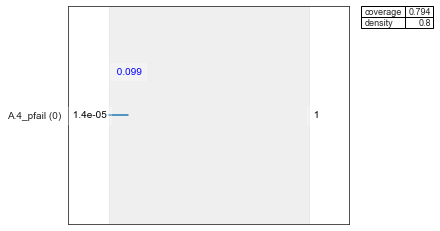

In [15]:
box_id=45
BOX = DAMAGE
boxes[percentiles[1]][BOX].inspect(box_id)
boxes[percentiles[1]][BOX].inspect(box_id, style='graph')
plt.show()

In [16]:
lims = boxes[percentiles[1]][BOX].box_lims[box_id]
limits = pd.concat([limits, pd.DataFrame(data={"outcome": ["damage " + str(percentiles[1])], "min": [lims["A.4_pfail"][0]], "max" :  [lims["A.4_pfail"][1]]})], axis=0)

In [17]:
limits

,outcome,min,max
0,damage 20,0.816157,0.999988
0,damage 90,0.000014,0.099266


## Deaths

In [18]:
box_id=34
BOX = DEATHS

coverage    0.706136
density     0.805199
id                34
mass         0.17464
mean        0.805199
res_dim            1
Name: 34, dtype: object

             box 34                       
                min       max    qp values
A.4_pfail  0.825356  0.999988  [0.0, -1.0]



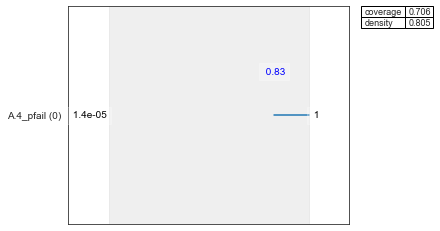

In [19]:
boxes[percentiles[0]][BOX].inspect(box_id)
boxes[percentiles[0]][BOX].inspect(box_id, style='graph')
plt.show()

In [20]:
lims = boxes[percentiles[0]][BOX].box_lims[box_id]

In [21]:
limits = pd.concat([limits, pd.DataFrame(data={"outcome": ["deaths " + str(percentiles[0])], "min": [lims["A.4_pfail"][0]], "max" :  [lims["A.4_pfail"][1]]})], axis=0)

In [22]:
box_id=41
BOX = DEATHS

coverage    0.972367
density     0.796588
id                41
mass         0.12192
mean        0.796588
res_dim            1
Name: 41, dtype: object

             box 41                       
                min       max    qp values
A.4_pfail  0.000014  0.121914  [-1.0, 0.0]



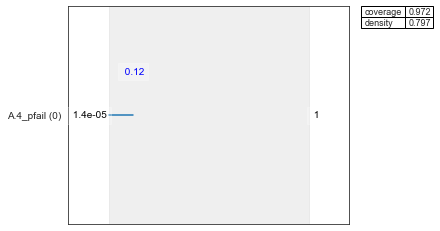

In [23]:
boxes[percentiles[1]][BOX].inspect(box_id)
boxes[percentiles[1]][BOX].inspect(box_id, style='graph')
plt.show()

In [24]:
lims = boxes[percentiles[1]][BOX].box_lims[box_id]

In [25]:
limits = pd.concat([limits, pd.DataFrame(data={"outcome": ["deaths " + str(percentiles[1])], "min": [lims["A.4_pfail"][0]], "max" :  [lims["A.4_pfail"][1]]})], axis=0)

# Visualisation

In [26]:
limits =limits.reset_index(drop=True)

In [27]:
limits

,outcome,min,max
0,damage 20,0.816157,0.999988
1,damage 90,0.000014,0.099266
2,deaths 20,0.825356,0.999988
3,deaths 90,0.000014,0.121914


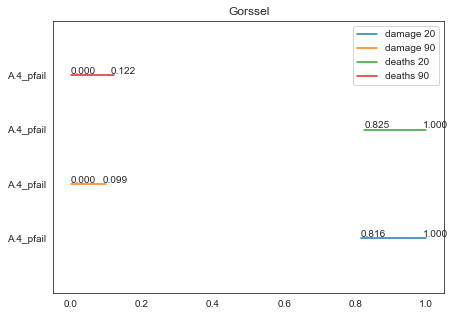

In [28]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111)
for index in limits.index:
    plt.plot([limits.loc[index]["min"],limits.loc[index]["max"]], [index,index])
    ax.annotate('{:.3f}'.format(limits.loc[index]["min"]),xy=(limits.loc[index]["min"],index +0.03))
    ax.annotate('{:.3f}'.format(limits.loc[index]["max"]),xy=(limits.loc[index]["max"]-0.01,index +0.03))
ax.grid(False)
ax.set_ylim([-1,4])
plt.legend(limits["outcome"].values)    
plt.yticks([0, 1, 2, 3], ["A.4_pfail"]*4)
plt.title("Gorssel")
plt.show()

Looking at all these plots for Gorssel, Overijssel and Deventer, there really are some striking differences. It's hard to compare the <40th percentile, since this one looks at <20th percentile, so we need to correct that later (in scen_disco!), but once again, for > 90th percentile, the range is $\geq$ 0.099

In [29]:
gorssel_scen = pd.read_csv("simulation/optimisation/Gorssel/selected.csv")

In [30]:
A4_pfail = gorssel_scen["A.4_pfail"]

0.8704588494473585
0.7499832047699677
0.4782696450522153
0.2860451612585706
0.0342204558160026
0.0352572124797946


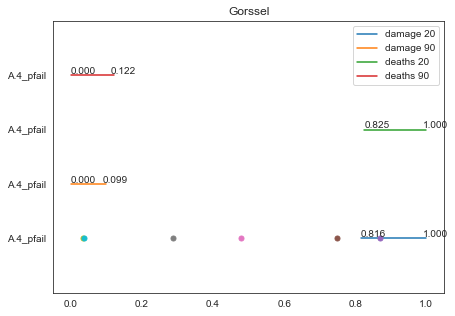

In [31]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111)
for index in limits.index:
    plt.plot([limits.loc[index]["min"],limits.loc[index]["max"]], [index,index])
    ax.annotate('{:.3f}'.format(limits.loc[index]["min"]),xy=(limits.loc[index]["min"],index +0.03))
    ax.annotate('{:.3f}'.format(limits.loc[index]["max"]),xy=(limits.loc[index]["max"]-0.01,index +0.03))

for pfail in A4_pfail:
    plt.plot(pfail, 0, markersize=5,  marker='o')
    print(pfail)
    
ax.grid(False)
ax.set_ylim([-1,4])
plt.legend(limits["outcome"].values)    
plt.yticks([0, 1,2, 3], ["A.4_pfail"]*4)
plt.title("Gorssel")
plt.show()

Note that two of the scenarios overlap (on the left). Happy our method works! We continue on this in scen_disco